In [1]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('demolitions_pse_isr_conflict_2004-01_to_2023-08.csv')
df.head()


,date_of_demolition,locality,district,area,housing_units,people_left_homeless,minors_left_homeless,type_of_sturcture,reason_for_demolition
0,2023-08-30,Tarqumya,Hebron,west-bank,2,0,0,Non Resedential,Demolition on the pretext of unlawful construc...
1,2023-08-29,al-Bweirah,Hebron,west-bank,1,0,0,Residental,Demolition on the pretext of unlawful construc...
2,2023-08-24,Shufah,Tulkarm,west-bank,1,0,0,Non Resedential,Demolition on the pretext of unlawful construc...
3,2023-08-21,Bidu,al-Quds,west-bank,8,0,0,Non Resedential,Demolition on the pretext of unlawful construc...
4,2023-08-21,Bidu,al-Quds,west-bank,3,0,0,Non Resedential,Demolition on the pretext of unlawful construc...


In [3]:
column_name = 'locality_encoded_fr'

# Выбираем строки, где значение в столбце 'X' является NaN
columns_to_check = ['date_of_demolition', 'locality', 'people_left_homeless']
rows_with_nan = df[df[columns_to_check].isna().any(axis=1)]

# Выводим строки с NaN в столбце 'X'
print(rows_with_nan)
df = df.dropna(subset=columns_to_check)

     date_of_demolition locality district       area  housing_units  \
2110         2018-08-07      NaN      NaN  west-bank              1   
3625         2012-12-04      NaN      NaN  west-bank              1   

      people_left_homeless  minors_left_homeless type_of_sturcture  \
2110                     0                     0   Non Resedential   
3625                     0                     0   Non Resedential   

                                  reason_for_demolition  
2110  Demolition on the pretext of unlawful construc...  
3625  Demolition on the pretext of unlawful construc...  


In [4]:
df.head()
data = df
data['date_of_demolition'] = pd.to_datetime(data['date_of_demolition'])
data['date_of_demolition'] = (data['date_of_demolition'].astype('datetime64[ns]').astype('int64') // 10**9).astype(int)
df.head()

,date_of_demolition,locality,district,area,housing_units,people_left_homeless,minors_left_homeless,type_of_sturcture,reason_for_demolition
0,1693353600,Tarqumya,Hebron,west-bank,2,0,0,Non Resedential,Demolition on the pretext of unlawful construc...
1,1693267200,al-Bweirah,Hebron,west-bank,1,0,0,Residental,Demolition on the pretext of unlawful construc...
2,1692835200,Shufah,Tulkarm,west-bank,1,0,0,Non Resedential,Demolition on the pretext of unlawful construc...
3,1692576000,Bidu,al-Quds,west-bank,8,0,0,Non Resedential,Demolition on the pretext of unlawful construc...
4,1692576000,Bidu,al-Quds,west-bank,3,0,0,Non Resedential,Demolition on the pretext of unlawful construc...


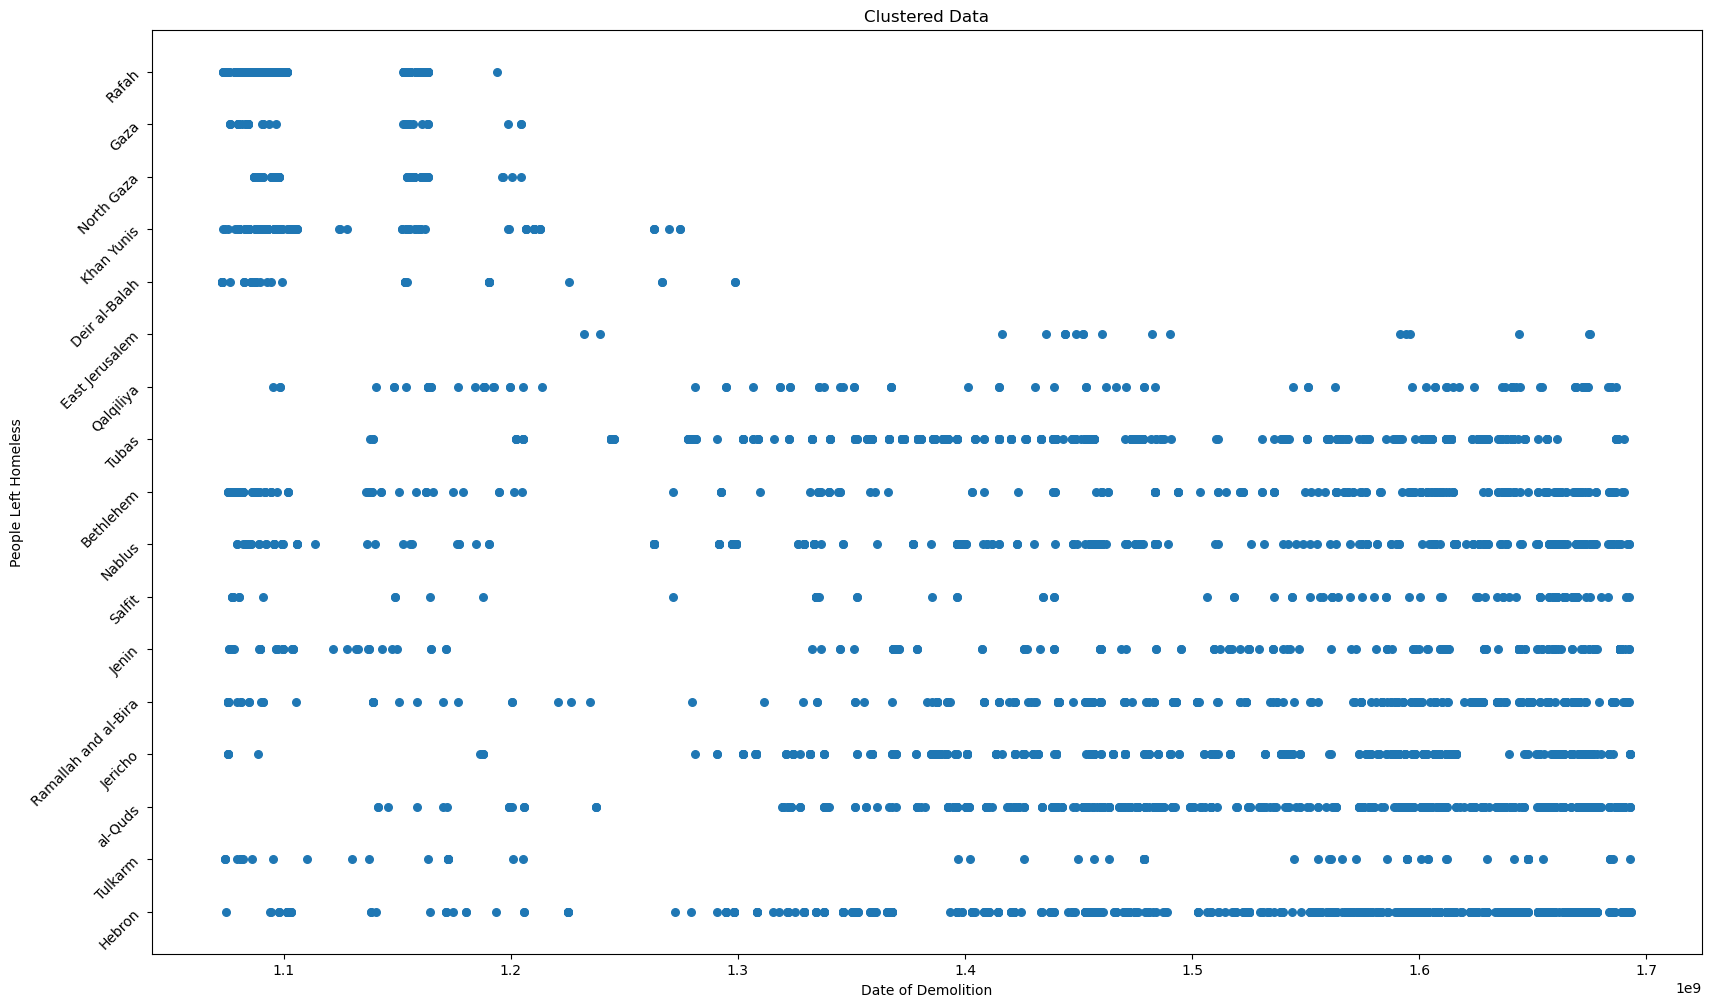

In [5]:
plt.figure(figsize=(20, 12))
plt.scatter(data['date_of_demolition'], data['district'], marker='o', s=30)
plt.title('Clustered Data')
plt.xlabel('Date of Demolition')
plt.yticks(rotation=45)
plt.ylabel('People Left Homeless')
plt.show()

In [6]:
locality_counts = data['locality'].value_counts().to_dict()
data['locality_encoded_fr'] = data['locality'].map(locality_counts)

# len(locality_counts)
data[['locality_encoded_fr', 'locality']]

,locality_encoded_fr,locality
0,43,Tarqumya
1,1,al-Bweirah
2,4,Shufah
3,3,Bidu
4,3,Bidu
...,...,...
5760,27,Deir al-Balah
5761,27,Deir al-Balah
5762,27,Deir al-Balah
5763,27,Deir al-Balah


In [7]:
column_name = 'locality_encoded_fr'

# Выбираем строки, где значение в столбце 'X' является NaN
columns_to_check = ['date_of_demolition', 'locality_encoded_fr', 'people_left_homeless']
rows_with_nan = data[data[columns_to_check].isna().any(axis=1)]

# Выводим строки с NaN в столбце 'X'
print(rows_with_nan)

Empty DataFrame
Columns: [date_of_demolition, locality, district, area, housing_units, people_left_homeless, minors_left_homeless, type_of_sturcture, reason_for_demolition, locality_encoded_fr]
Index: []


In [8]:



# data['date_of_demolition'] = (data['date_of_demolition'].astype('int64') // 10**9).astype(int)  # Преобразование даты в числовой формат
#label_encoder = LabelEncoder()
#data['locality'] = label_encoder.fit_transform(data['locality'])
#data['district'] = label_encoder.fit_transform(data['district'])





scaler = StandardScaler()
normalized_data = scaler.fit_transform(data[['date_of_demolition', 'locality_encoded_fr', 'people_left_homeless']])
print(normalized_data)
kmeans = KMeans(n_clusters=8)

eps_value = 0.5  # Подберите подходящее значение
min_samples_value = 5  # Подберите подходящее значение
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)

dbscan.fit(normalized_data)

# Получаем метки кластеров
cluster_labels = dbscan.labels_

# Добавляем метки кластеров в DataFrame
data['cluster_dbscan'] = cluster_labels

data['cluster_Kmeans'] = kmeans.fit_predict(normalized_data)
# Вывод результатов кластеризации
print(data[['date_of_demolition', 'district', 'people_left_homeless', 'cluster_Kmeans','cluster_dbscan']])


[[ 1.34507087 -0.39075854 -0.50300174]
 [ 1.34467481 -0.67411497 -0.50300174]
 [ 1.34269451 -0.65387522 -0.50300174]
 ...
 [-1.49903013 -0.49870385  0.72136008]
 [-1.49903013 -0.49870385  0.23161535]
 [-1.49903013 -0.49870385  0.72136008]]
      date_of_demolition       district  people_left_homeless  cluster_Kmeans  \
0             1693353600         Hebron                     0               3   
1             1693267200         Hebron                     0               3   
2             1692835200        Tulkarm                     0               3   
3             1692576000        al-Quds                     0               3   
4             1692576000        al-Quds                     0               3   
...                  ...            ...                   ...             ...   
5760          1072915200  Deir al-Balah                     6               6   
5761          1072915200  Deir al-Balah                     2               6   
5762          1072915200  Deir 

c:\Anaconda\envs\sklearn-env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


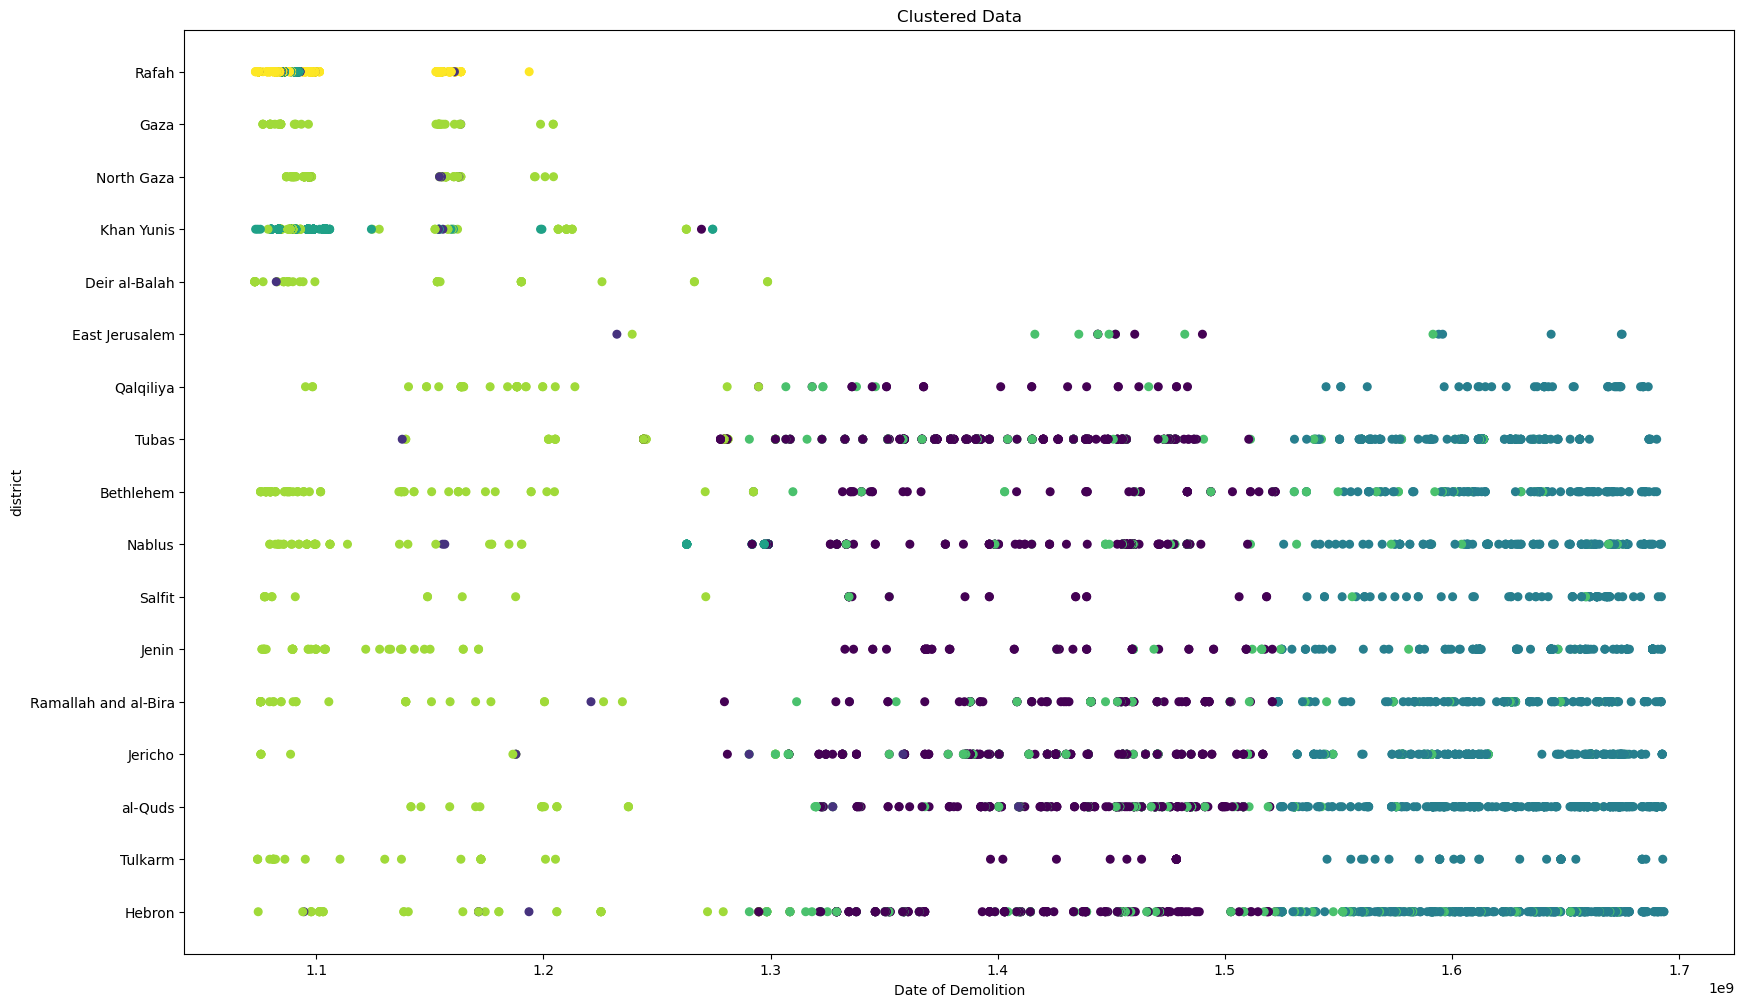

In [10]:
plt.figure(figsize=(20, 12))
plt.scatter(data['date_of_demolition'], data['district'], c=data['cluster_Kmeans'], cmap='viridis', marker='o', s=30)
plt.title('Clustered Data')
plt.xlabel('Date of Demolition')
plt.ylabel('District')
plt.show()

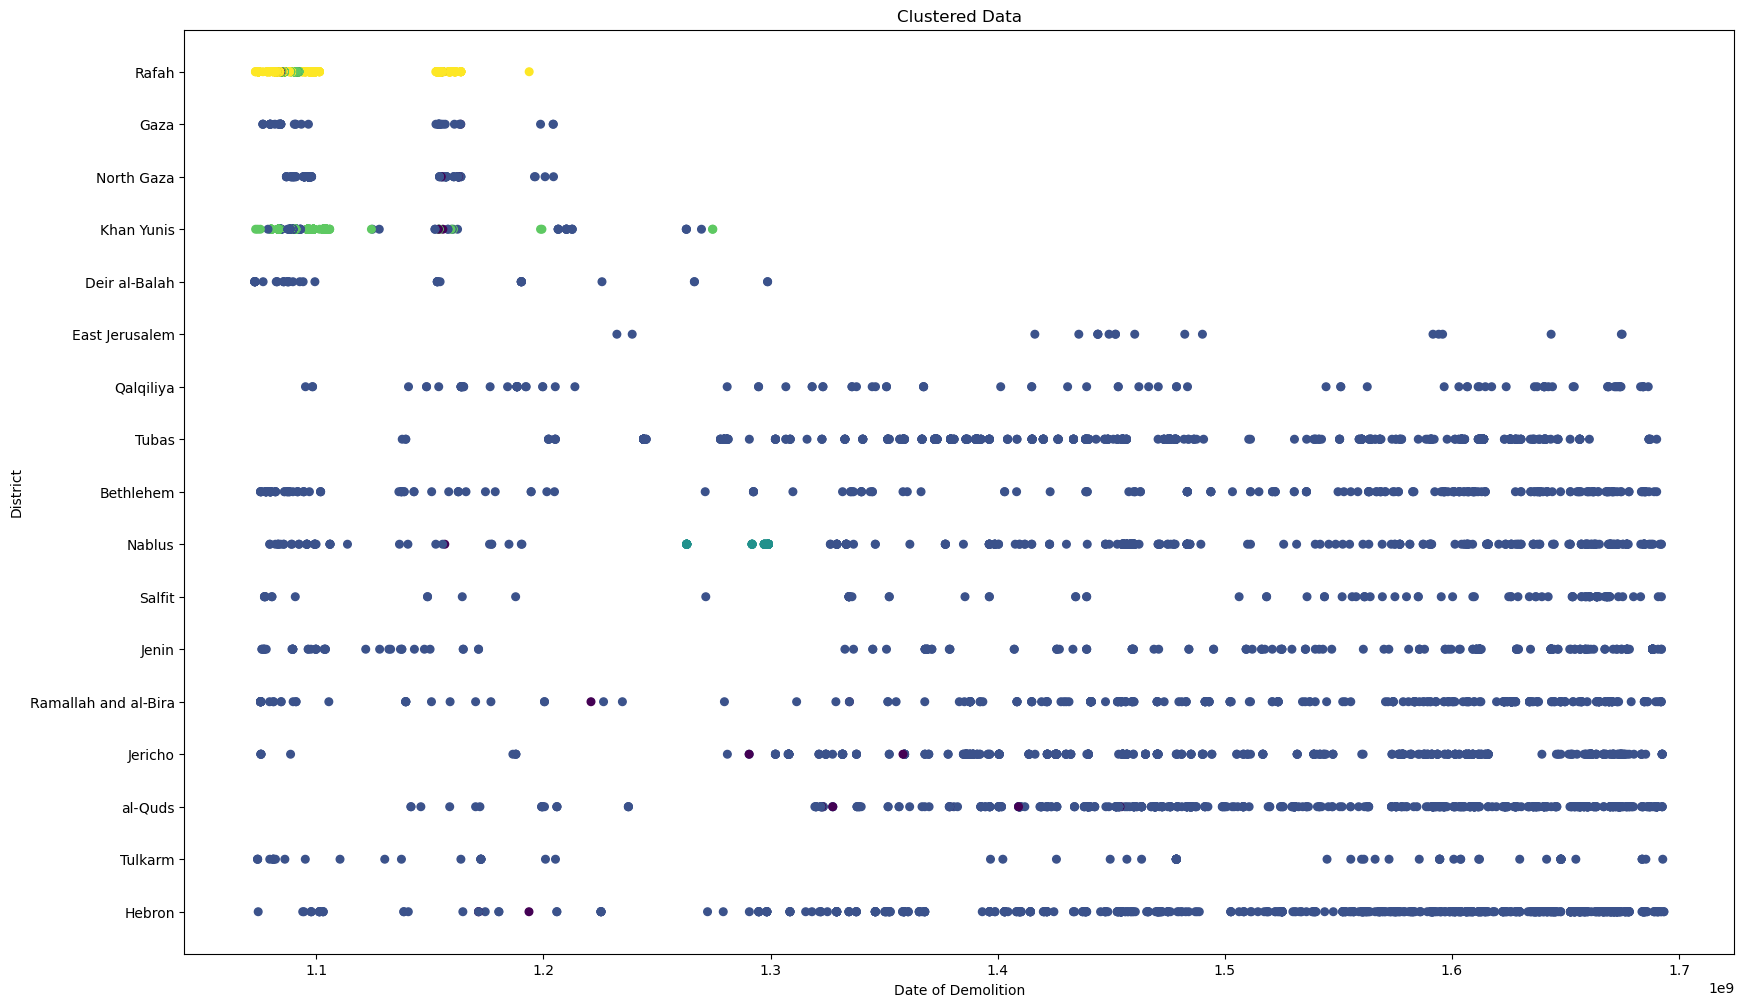

In [11]:
plt.figure(figsize=(20, 12))
plt.scatter(data['date_of_demolition'], data['district'], c=data['cluster_dbscan'], cmap='viridis', marker='o', s=30)
plt.title('Clustered Data')
plt.xlabel('Date of Demolition')
plt.ylabel('District')
plt.show()

c:\Anaconda\envs\sklearn-env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Anaconda\envs\sklearn-env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Anaconda\envs\sklearn-env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Anaconda\envs\sklearn-env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

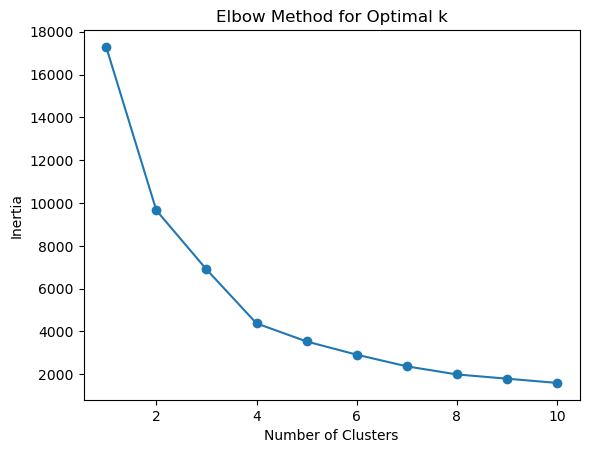

In [12]:


inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data)
    inertia.append(kmeans.inertia_)

# Построение графика метода локтя
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()